# Homework 6: Advection and Diffusion

#### Objective:
In this homework, we will investigate the comparative magnitudes of advection and diffusion of heat in the ocean. For this exercise, we will rely on output from the ECCO Version 5 State Estimate.

#### Import Modules:
Begin by importing the modules to read in data from NetCDF files, conduct calculations, and make plots.

In [1]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

Define a path to your data folder where you will store data for this exercise.

In [2]:
data_folder = r'D:\data'

## Part 1: The Heat Equation
In the space below, write down the equation that describes the evolution of temperature in the ocean. Then, for each term in the equation, write one sentence to describe what the term means qualitatively.

$$
\frac{D\theta}{Dt}=\kappa\frac{\partial^2T\theta}{\partial t^2}+\frac{J_H}{C_p\rho_\omega}
$$

Lagrangian derivative, measures how potential temperature changes with respect to time for a moving fluid
$$\frac{D\theta}{Dt}$$

Thermal diffusivity of water
$$\kappa$$

Diffusion of heat through water
$$\kappa\frac{\partial^2T\theta}{\partial t^2}$$

Advection of heat through water
$$\frac{J_H}{C_p\rho_\omega}$$

Change in water
$$J_H$$

Heat capacity of water
$$C_p$$

Density of water
$$\rho_\omega$$

## Part 2: Considering Temperature
In class, we wrote the temperature equation with the symbol $\Theta$. What does this term signify and why do we use it instead of temperature $T$?

The symbol $\Theta$ represents the potential temperature. It is used in place of $T$ because it reflects the pressure changes in water that temperature $T$ does not.

## Part 3: Download Data
To compare the relative magnitudes of advection and diffusion in the ocean, we will use output from the ECCO Version 5 State Estimate.

Download the following files from the [ECCO Drive]():
- Version5/Alpha/nctiles_monthly/ADVx_TH/ADVx_TH_2010.nc
- Version5/Alpha/nctiles_monthly/ADVy_TH/ADVy_TH_2010.nc
- Version5/Alpha/nctiles_monthly/DFxE_TH/DFxE_TH_2010.nc
- Version5/Alpha/nctiles_monthly/DFyE_TH/DFyE_TH_2010.nc
- Version5/Alpha/nctiles_grid/GRID.0002.nc

The final file in the list describes the geometry of the second tile of the ECCO model grid. The model is divided up into 13 tiles, each corresponding to a different part of the ocean.

Be sure to keep these files organized in your `data_folder`.

## Part 4: Read in the data
The files downloaded above refer to the $x$- and $y$-components of advection and diffusion (vector quantities). The $x$-component is aligned roughly eastward and the $y$-component is aligned roughly northward near the equator. Read in the 4 advection and diffusion fields. The units of these fields is given by $^{\circ}$C$\cdot$m$^3$/s - a transport of temperature with volume. The quantity can by converted to a heat flux (in units of $W$) by considering specific heat ($C_p$) and the density $\rho_w$ of seawater. It is not necessary to make this conversion in this homework.


In addition to the 4 fields above, also read in the fields 'XC' and 'YC' from the GRID.0002.nc file. These components correspond to longitude and latitude in the second tile of the ECCO Grid.

In [3]:
# read in your data here
m_data = ["ADVx_TH", "ADVy_TH", "DFxE_TH", "DFyE_TH"]
data_path = os.path.join(data_folder, "ECCO", "Version5", "Alpha")
grid_file = os.path.join(data_path, "nctiles_grid", "GRID.0002.nc")
advx_file = os.path.join(data_path, "nctiles_monthly", m_data[0], f"{m_data[0]}_2010.nc")
advy_file = os.path.join(data_path, "nctiles_monthly", m_data[1], f"{m_data[1]}_2010.nc")
dfxe_file = os.path.join(data_path, "nctiles_monthly", m_data[2], f"{m_data[2]}_2010.nc")
dfye_file = os.path.join(data_path, "nctiles_monthly", m_data[3], f"{m_data[3]}_2010.nc")

grid_d = xr.open_dataset(grid_file)
grid_xc, grid_yc = grid_d["XC"], grid_d["YC"]
grid_d.close()

advx_d, advy_d = xr.open_dataset(advx_file), xr.open_dataset(advy_file) 
advx_th, advy_th = advx_d["ADVx_TH"], advy_d["ADVy_TH"]
advx_d.close()
advy_d.close()

dfxe_d, dfye_d = xr.open_dataset(dfxe_file), xr.open_dataset(dfye_file) 
dfxe_th, dfye_th = dfxe_d["DFxE_TH"], dfye_d["DFyE_TH"]
dfxe_d.close()
dfye_d.close()

Subset the variables to the first timestep ($time=0$), on the first depth level ($k=0$), on the second tile ($tile=1$). In addition, if you have not done so already, be sure to convert your data to a `numpy` array (important for subsequent calculations).

In [4]:
# subset your data here
advx_s = np.array(advx_th.isel(time=0, k=0, tile=1))
advy_s = np.array(advy_th.isel(time=0, k=0, tile=1))
dfxe_s = np.array(dfxe_th.isel(time=0, k=0, tile=1))
dfye_s = np.array(dfye_th.isel(time=0, k=0, tile=1))

## Part 5: Plot of advection and diffusion
Next, plot the vector components of advection and diffusion in a 2x2 grid of plots. In creating your plot, be sure to do the following:
- Use the `vmin` and `vmax` values in the `pcolormesh` plotting command to control the minimum and maximum values of the plot. Each pair of plots ($x$- and $y$- components for advection, $x$- and $y$- components for diffusion) should use the same bounds. You color bounds should fit the data appropriately and the min and max values should match (-1*min = max). You may find the functions `np.min()` and `np.max()` helpful.
- Add a colorbar and use a divergent colormap, such as 'seismic' or something similar.
- Add labels to your axes and a title on each subplot

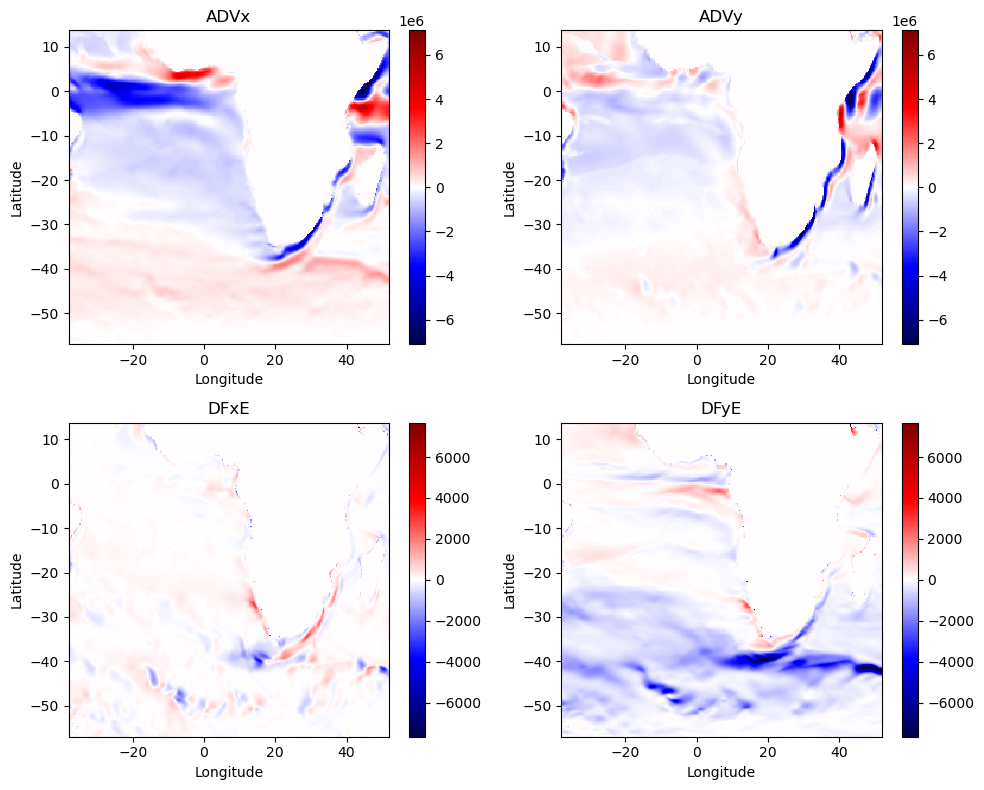

In [5]:
# make your plot here
adv_bounds = max(np.abs(np.min(advx_s)), np.max(advx_s),
                 np.abs(np.min(advy_s)), np.max(advy_s)) / 2

df_bounds = max(np.abs(np.min(dfxe_s)), np.max(dfxe_s),
                 np.abs(np.min(dfye_s)), np.max(dfye_s)) / 6

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

ax[0, 0].set_title("ADVx")
ax[0, 0].set_xlabel("Longitude")
ax[0, 0].set_ylabel("Latitude")
C = ax[0, 0].pcolormesh(grid_xc, grid_yc, advx_s, vmin=-adv_bounds, vmax=adv_bounds, cmap='seismic')
fig.colorbar(C, ax=ax[0, 0], orientation='vertical')

ax[0, 1].set_title("ADVy")
ax[0, 1].set_xlabel("Longitude")
ax[0, 1].set_ylabel("Latitude")
C = ax[0, 1].pcolormesh(grid_xc, grid_yc, advy_s, vmin=-adv_bounds, vmax=adv_bounds, cmap='seismic')
fig.colorbar(C, ax=ax[0, 1], orientation='vertical')

ax[1, 0].set_title("DFxE")
ax[1, 0].set_xlabel("Longitude")
ax[1, 0].set_ylabel("Latitude")
C = ax[1, 0].pcolormesh(grid_xc, grid_yc, dfxe_s, vmin=-df_bounds, vmax=df_bounds, cmap='seismic')
fig.colorbar(C, ax=ax[1, 0], orientation='vertical')

ax[1, 1].set_title("DFyE")
ax[1, 1].set_xlabel("Longitude")
ax[1, 1].set_ylabel("Latitude")
C = ax[1, 1].pcolormesh(grid_xc, grid_yc, dfye_s, vmin=-df_bounds, vmax=df_bounds, cmap='seismic')
fig.colorbar(C, ax=ax[1, 1], orientation='vertical')

plt.tight_layout()
plt.show()

## Part 6: Plot Magnitudes
To compare the differences advection and diffusion, we first need to compute the magnitude. The magnitude of a vector quantity is given by

$$
|\textbf{v}| = \sqrt{v_x^2 + v_y^2}
$$

Apply this formula to the fields above to produce fields of 2D advection and diffusion at the surface of the ocean.

In [6]:
# conduct your calculation here
adv_mag = np.sqrt(advx_s**2 + advy_s**2)
df_mag = np.sqrt(dfxe_s**2 + dfye_s**2)

Now, plot the magnitudes of advection and diffusion. Since we are now working with magnitude rather than directional values, you should use a sequential colormap rather than a divergent colormap.

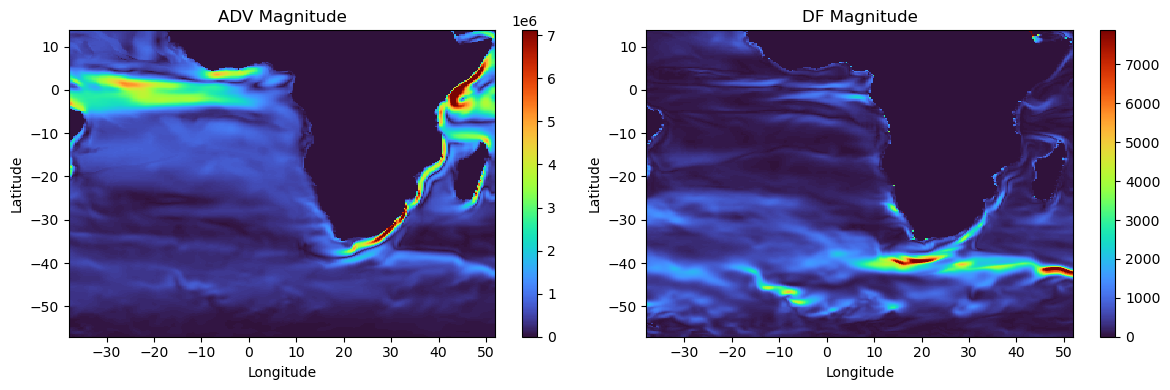

In [7]:
# make your plot here
adv_mag_bounds = np.max(adv_mag) / 2
df_mag_bounds = np.max(df_mag) / 6

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].set_title("ADV Magnitude")
ax[0].set_xlabel("Longitude")
ax[0].set_ylabel("Latitude")
C = ax[0].pcolormesh(grid_xc, grid_yc, adv_mag, vmax=adv_mag_bounds, cmap='turbo')
fig.colorbar(C, ax=ax[0])

ax[1].set_title("DF Magnitude")
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")
C = ax[1].pcolormesh(grid_xc, grid_yc, df_mag, vmax=df_mag_bounds, cmap='turbo')
fig.colorbar(C, ax=ax[1])

plt.tight_layout()
plt.show()

What is the mean ratio between advection and diffusion of temperature? Do a quick calculation below to compute the ratio. Be sure not to include points on land where the magnitude of each is 0.

In [8]:
# conduct your computation here
cond1 = (adv_mag > 0)
cond2 = (df_mag > 0)
ratio = adv_mag[cond1] / df_mag[cond2]
print(np.mean(ratio))

6029.311


## Part 7: Advection vs Diffusion
In the calculation above, we see that one process is responsible for transporting much more heat than the other. Which process is larger?

Suppose you would like to simplify the ocean model to be less computationally expensive. One way that you could achieve this is by removing processes from the model which have less of an effect on the model behavior than others. Based on the above plots and calculations, which process would you remove? Specifically, in the equation written in part 1, which term would you cancel from the equation?

$$
\frac{D\theta}{Dt}=\kappa\frac{\partial^2T\theta}{\partial t^2}+\frac{J_H}{C_p\rho_\omega}
$$

The advection process $\frac{J_H}{C_p\rho_\omega}$ is much larger than diffusion at around a ratio of 6029:1.

$\kappa\frac{\partial^2T\theta}{\partial t^2}$ represents diffusion of heat through water. Diffusion can be removed from the equation, as it does not matter as much compared to advection $\frac{J_H}{C_p\rho_\omega}$.